In [ ]:
#!unzip "/content/drive/MyDrive/Pneumonia_dataset/archive.zip" -d "/content/drive/MyDrive/Major_project_code/MajorCode/"

In [ ]:
import numpy as np                     
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
from tqdm import tqdm
from keras.preprocessing import image

In [ ]:
path1 = '/content/drive/MyDrive/Major_project_code/MajorCode/chest_xray/test/'
train = os.listdir(path1)

In [ ]:
folders=[]
folders = [f for f in sorted(os.listdir(path1))]
print(folders)

['NORMAL', 'PNEUMONIA']


In [ ]:
labels = folders
print (f'The labels are {labels}')
 
# setting the size of images that we want
 
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['NORMAL', 'PNEUMONIA']
All images to be resized into 224*224 pixels


In [ ]:
i = []

while(True):

    i.append('a')

In [ ]:
# defining a function to load images and labels together
# this function will also resize the images
 
def load_train5(path1):
    
    images = []
    
    for label in labels:
        direc = os.path.join(path1, label)
        class_num = labels.index(label)
        
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image))
            image_resized = cv.resize(image_read,(image_size,image_size),3)#modified here for getting output as (1,224,224,3) not as (224,224)
            images.append([image_resized,class_num])
            
    return np.array(images)

In [ ]:
#loading without Grayscale 
train_images5 = load_train5(path1)
 
print(f'Shape of the training images = {train_images5.shape}')

Shape of the training images = (624, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
train_images5.shape

(624, 2)

In [ ]:
#loading the images and labels seperately in X and y, to be used later for training
X5 = []
y5 = []

for feature, label in train_images5:
    X5.append(feature)
    y5.append(label)
    
print (f'Length of X = {len(X5)}')
print (f'Length of y = {len(y5)}')

Length of X = 624
Length of y = 624


In [ ]:
X51=np.array(X5)
y51= np.array(y5)

In [ ]:
with open('testpneumoniaandlabels.npy', 'wb') as f:
    np.save(f, X51)
    np.save(f, y51)

In [ ]:
path2 = '/content/drive/MyDrive/Major_project_code/MajorCode/chest_xray/train/'
train = os.listdir(path2)

In [ ]:
folders1=[]
folders1 = [f for f in sorted(os.listdir(path2))]
print(folders1)

['NORMAL', 'PNEUMONIA']


In [ ]:
labels1 = folders1
print (f'The labels are {labels1}')
 
# setting the size of images that we want
 
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['NORMAL', 'PNEUMONIA']
All images to be resized into 224*224 pixels


In [ ]:
# defining a function to load images and labels together
# this function will also resize the images
 
def load_train6(path2):
    
    images1 = []
    
    for label in labels1:
        direc1 = os.path.join(path2, label)
        class_num = labels.index(label)
        
        for image in os.listdir(direc1):
            image_read = cv.imread(os.path.join(direc1,image))
            image_resized = cv.resize(image_read,(image_size,image_size),3)#modified here for getting output as (1,224,224,3) not as (224,224)
            images1.append([image_resized,class_num])
            
    return np.array(images1)

In [ ]:
#loading without Grayscale 
train_images6 = load_train6(path2)
 
print(f'Shape of the training images = {train_images6.shape}')

Shape of the training images = (5216, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#loading the images and labels seperately in X and y, to be used later for training
X4 = []
y4 = []

for feature, label in train_images6:
    X4.append(feature)
    y4.append(label)
    
print (f'Length of X = {len(X4)}')
print (f'Length of y = {len(y4)}')

Length of X = 5216
Length of y = 5216


In [ ]:
X41=np.array(X4)
y41= np.array(y4)

In [ ]:
with open('trainpneumoniaandlabels.npy', 'wb') as f:
    np.save(f, X41)
    np.save(f, y41)

Transfer Learning part

In [ ]:
with open('/content/drive/MyDrive/Major_project_code/Array_of_test_and_train/trainpneumoniaandlabels.npy', 'rb') as f:
    X41 = np.load(f)
    y41 = np.load(f)

In [ ]:
with open('/content/drive/MyDrive/Major_project_code/Array_of_test_and_train/testpneumoniaandlabels.npy', 'rb') as f:
    X51 = np.load(f)
    y51 = np.load(f)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Major_project_code/MajorCode/chest_xray/train'
valid_path = '/content/drive/MyDrive/Major_project_code/MajorCode/chest_xray/train'

In [ ]:
import tensorflow as tf
vgg1 = tf.keras.applications.DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg1.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Major_project_code/MajorCode/chest_xray/train/*')

In [ ]:
x = Flatten()(vgg1.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
modeled = Model(inputs=vgg1.input, outputs=prediction)

In [ ]:
modeled.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
training_labels=tf.keras.utils.to_categorical(y41)
testing_labels1=tf.keras.utils.to_categorical(y51)

In [ ]:
modeled.summary()

In [ ]:
m2=modeled.fit(X41,training_labels,epochs=50,validation_data=(X51,testing_labels1))#vgg19

In [ ]:
m2=modeled.fit(X41,training_labels,epochs=10,validation_data=(X51,testing_labels1))#Resnet50

Epoch 1/10
163/163 [==============================] - 20s 124ms/step - loss: 1.3187e-06 - accuracy: 1.0000 - val_loss: 3.5552 - val_accuracy: 0.7917
Epoch 2/10
163/163 [==============================] - 20s 124ms/step - loss: 1.2295e-06 - accuracy: 1.0000 - val_loss: 3.5355 - val_accuracy: 0.7917
Epoch 3/10
163/163 [==============================] - 20s 124ms/step - loss: 1.1564e-06 - accuracy: 1.0000 - val_loss: 3.5803 - val_accuracy: 0.7917
Epoch 4/10
163/163 [==============================] - 20s 123ms/step - loss: 1.0611e-06 - accuracy: 1.0000 - val_loss: 3.5356 - val_accuracy: 0.7917
Epoch 5/10
163/163 [==============================] - 20s 124ms/step - loss: 1.0063e-06 - accuracy: 1.0000 - val_loss: 3.5540 - val_accuracy: 0.7917
Epoch 6/10
163/163 [==============================] - 20s 124ms/step - loss: 9.3213e-07 - accuracy: 1.0000 - val_loss: 3.5903 - val_accuracy: 0.7917
Epoch 7/10
163/163 [==============================] - 20s 124ms/step - loss: 8.7655e-07 - accuracy: 1.0000

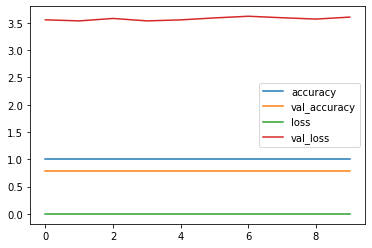

In [ ]:
plt.plot(m2.history['accuracy'], label='accuracy')#Resnet50
plt.plot(m2.history['val_accuracy'], label='val_accuracy')
plt.plot(m2.history['loss'], label='loss')
plt.plot(m2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
pred2=modeled.predict(X51)#Resnet50
predicted_classes1 = np.argmax(pred2, axis=1)
predicted_classes1

predicted_labels1=tf.keras.utils.to_categorical(predicted_classes1)

from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(predicted_classes1, y51)

array([[105,   1],
       [129, 389]])

In [ ]:
import sklearn#Resnet50
p1=sklearn.metrics.classification_report(y51,predicted_classes1)
print(p1)

              precision    recall  f1-score   support

           0       0.99      0.45      0.62       234
           1       0.75      1.00      0.86       390

    accuracy                           0.79       624
   macro avg       0.87      0.72      0.74       624
weighted avg       0.84      0.79      0.77       624



My algo

In [ ]:
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/Major_project_code/Array_of_test_and_train/trainpneumoniaandlabels.npy', 'rb') as f:
    X41 = np.load(f)
    y41 = np.load(f)

In [ ]:
with open('/content/drive/MyDrive/Major_project_code/Array_of_test_and_train/testpneumoniaandlabels.npy', 'rb') as f:
    X51 = np.load(f)
    y51 = np.load(f)

If needed weights balancing then use it

In [ ]:
from sklearn.utils import class_weight
import numpy as np
 
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(training_set.classes), 
                training_set.classes)

In [ ]:
class_weights

In [ ]:
class_weighted={0: 6.86138614, 1: 0.68852459, 2: 0.7133299}

Needed weights code ended here

In [ ]:
import tensorflow as tf
training_labels=tf.keras.utils.to_categorical(y41)
testing_labels1=tf.keras.utils.to_categorical(y51)

In [ ]:
# baseline model with data augmentation on the X-Ray dataset
import sys
from matplotlib import pyplot
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import keras.backend as K

In [ ]:
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(3, activation='softmax'))
# compile model
opt =  Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', precision, recall])

In [ ]:
#without smoting, but with metrics=['precision','recall']
#@tf.function got this without augmentation just by scratch code with class_weights
"""m2=model.fit(X41,training_labels,epochs=30,validation_data=(X51,testing_labels1),class_weight=class_weighted)"""#working after making y41 to (training_labels=tf.keras.utils.to_categorical(y41))

In [ ]:
training_labels.shape

(5216, 2)

In [ ]:
m2=model.fit(X41,training_labels,epochs=30,validation_data=(X51,testing_labels1))

My algo ended here